In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.rcParams['font.sans-serif']=['SimHei']    #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号
matplotlib.rcParams['font.family'] = 'SimHei'  
matplotlib.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'

In [2]:
#读取数据
prediction_pro = pd.read_csv('prediction_pro.csv', encoding='utf-8')
#display(prediction_pro.info())
display(prediction_pro.head())

validation = pd.read_csv('validation.csv', encoding='utf-8')
#display(prediction_pro.info())
display(validation.head())

,PROVINCE,SSP,YEAR,GDP,POP,LDP,BA,CCF,人均CCF,GDP_CCF_P,GDP2,GDP_POP,GDP_LDP,GDP_BA,result
0,安徽省,SSP1,2020,25098.66508,59553012,36771.85322,2230.975467,3573180720,60,1505919.905,629942988.8,1.490000e+12,9.229244e+08,55994506.05,398543.4670
1,安徽省,SSP1,2021,26341.53474,59541502,39286.51899,2283.182068,3572490120,60,1580492.084,661137358.1,1.490000e+12,9.860392e+08,57304822.04,426520.6095
2,安徽省,SSP1,2022,27563.63558,59499476,41743.54592,2331.820763,3569968560,60,1653818.135,691810457.8,1.490000e+12,1.047707e+09,58525588.36,428641.0090
3,安徽省,SSP1,2023,28751.04266,59429980,44118.42901,2376.956310,3565798800,60,1725062.560,721612790.4,1.490000e+12,1.107314e+09,59658430.33,449884.7035
4,安徽省,SSP1,2024,29889.35633,59336071,46390.03731,2418.687370,3560164260,60,1793361.380,750182944.0,1.490000e+12,1.164328e+09,60705824.23,557701.6555


,PROVINCE,CITY,YEAR,SLUDGE,GDP,POP,LDP,BA,CCF,WWP,CCF_P,GDP_CCF_P,GDP2,GDP_POP,GDP_LDP,GDP_BA,result
0,全国,全国,2018,13532706.26,772062.56050,1384421573,683484.75,58455.66,9.894950e+10,5211248.73,71.473534,NaN,NaN,NaN,NaN,NaN,1.350219e+07
1,北京市,北京市,2018,1724892.44,22309.34548,21365017,17646.01,1469.05,1.275445e+09,193202.00,59.697826,1.331819e+06,1.722421e+10,1.650000e+13,1.362382e+10,1.134199e+09,1.051841e+06
2,天津市,天津市,2018,124451.96,15801.48192,12559198,21369.29,1077.83,9.741115e+08,104090.47,77.561600,1.225588e+06,1.219973e+10,9.700000e+12,1.649843e+10,8.321522e+08,5.510495e+05
3,河北省,河北省,2018,514386.65,31065.72761,77128852,20655.24,2162.73,5.355396e+09,175787.42,69.434400,2.157030e+06,2.398469e+10,5.950000e+13,1.594714e+10,1.669763e+09,3.186017e+05
4,山西省,山西省,2018,196051.79,12434.90905,36404478,8395.94,1180.11,2.432784e+09,82696.95,66.826500,8.309814e+05,9.600528e+09,2.810000e+13,6.482191e+09,9.111187e+08,1.400592e+05


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


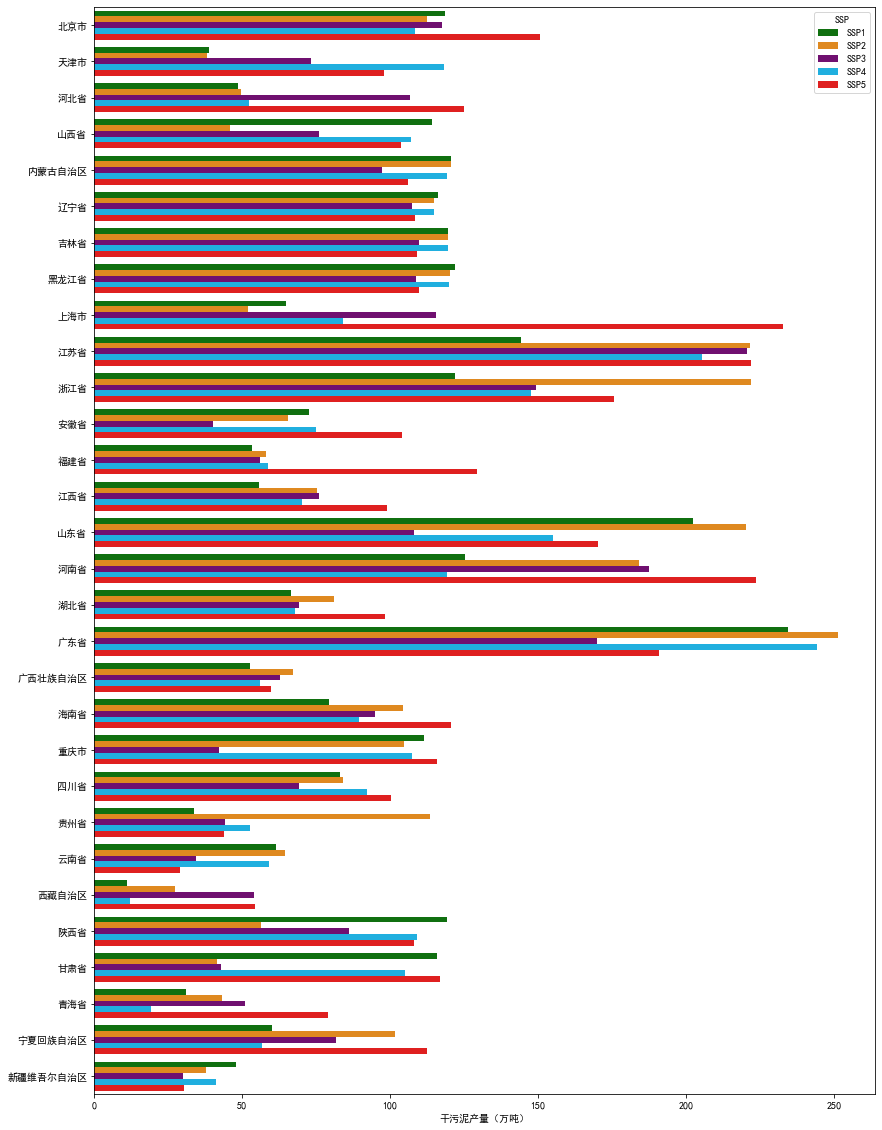

In [3]:
#绘制2100年分省污泥柱状图

#sns.set_context('poster')
pro = prediction_pro[prediction_pro['YEAR'] == 2100]
pro['R'] = pro['result']/10000
plt.figure(figsize=(14, 20))
sns.set_palette(['g','darkorange','purple','deepskyblue','red'])
sns.barplot(y='PROVINCE', x='R',order=['北京市','天津市','河北省','山西省',\
                                       '内蒙古自治区','辽宁省','吉林省','黑龙江省',\
                                       '上海市','江苏省','浙江省','安徽省','福建省',\
                                       '江西省','山东省','河南省','湖北省','广东省',\
                                       '广西壮族自治区','海南省','重庆市','四川省','贵州省',\
                                       '云南省','西藏自治区','陕西省','甘肃省','青海省',\
                                       '宁夏回族自治区','新疆维吾尔自治区'], data=pro, hue='SSP')
#plt.xticks(rotation=90)
#g.set(xlabel=None, ylabel='干污泥产量（万吨）')
plt.ylabel(None)
plt.xlabel('干污泥产量（万吨）')
plt.savefig('bar.png',dp1=300,bbox_inches = 'tight')

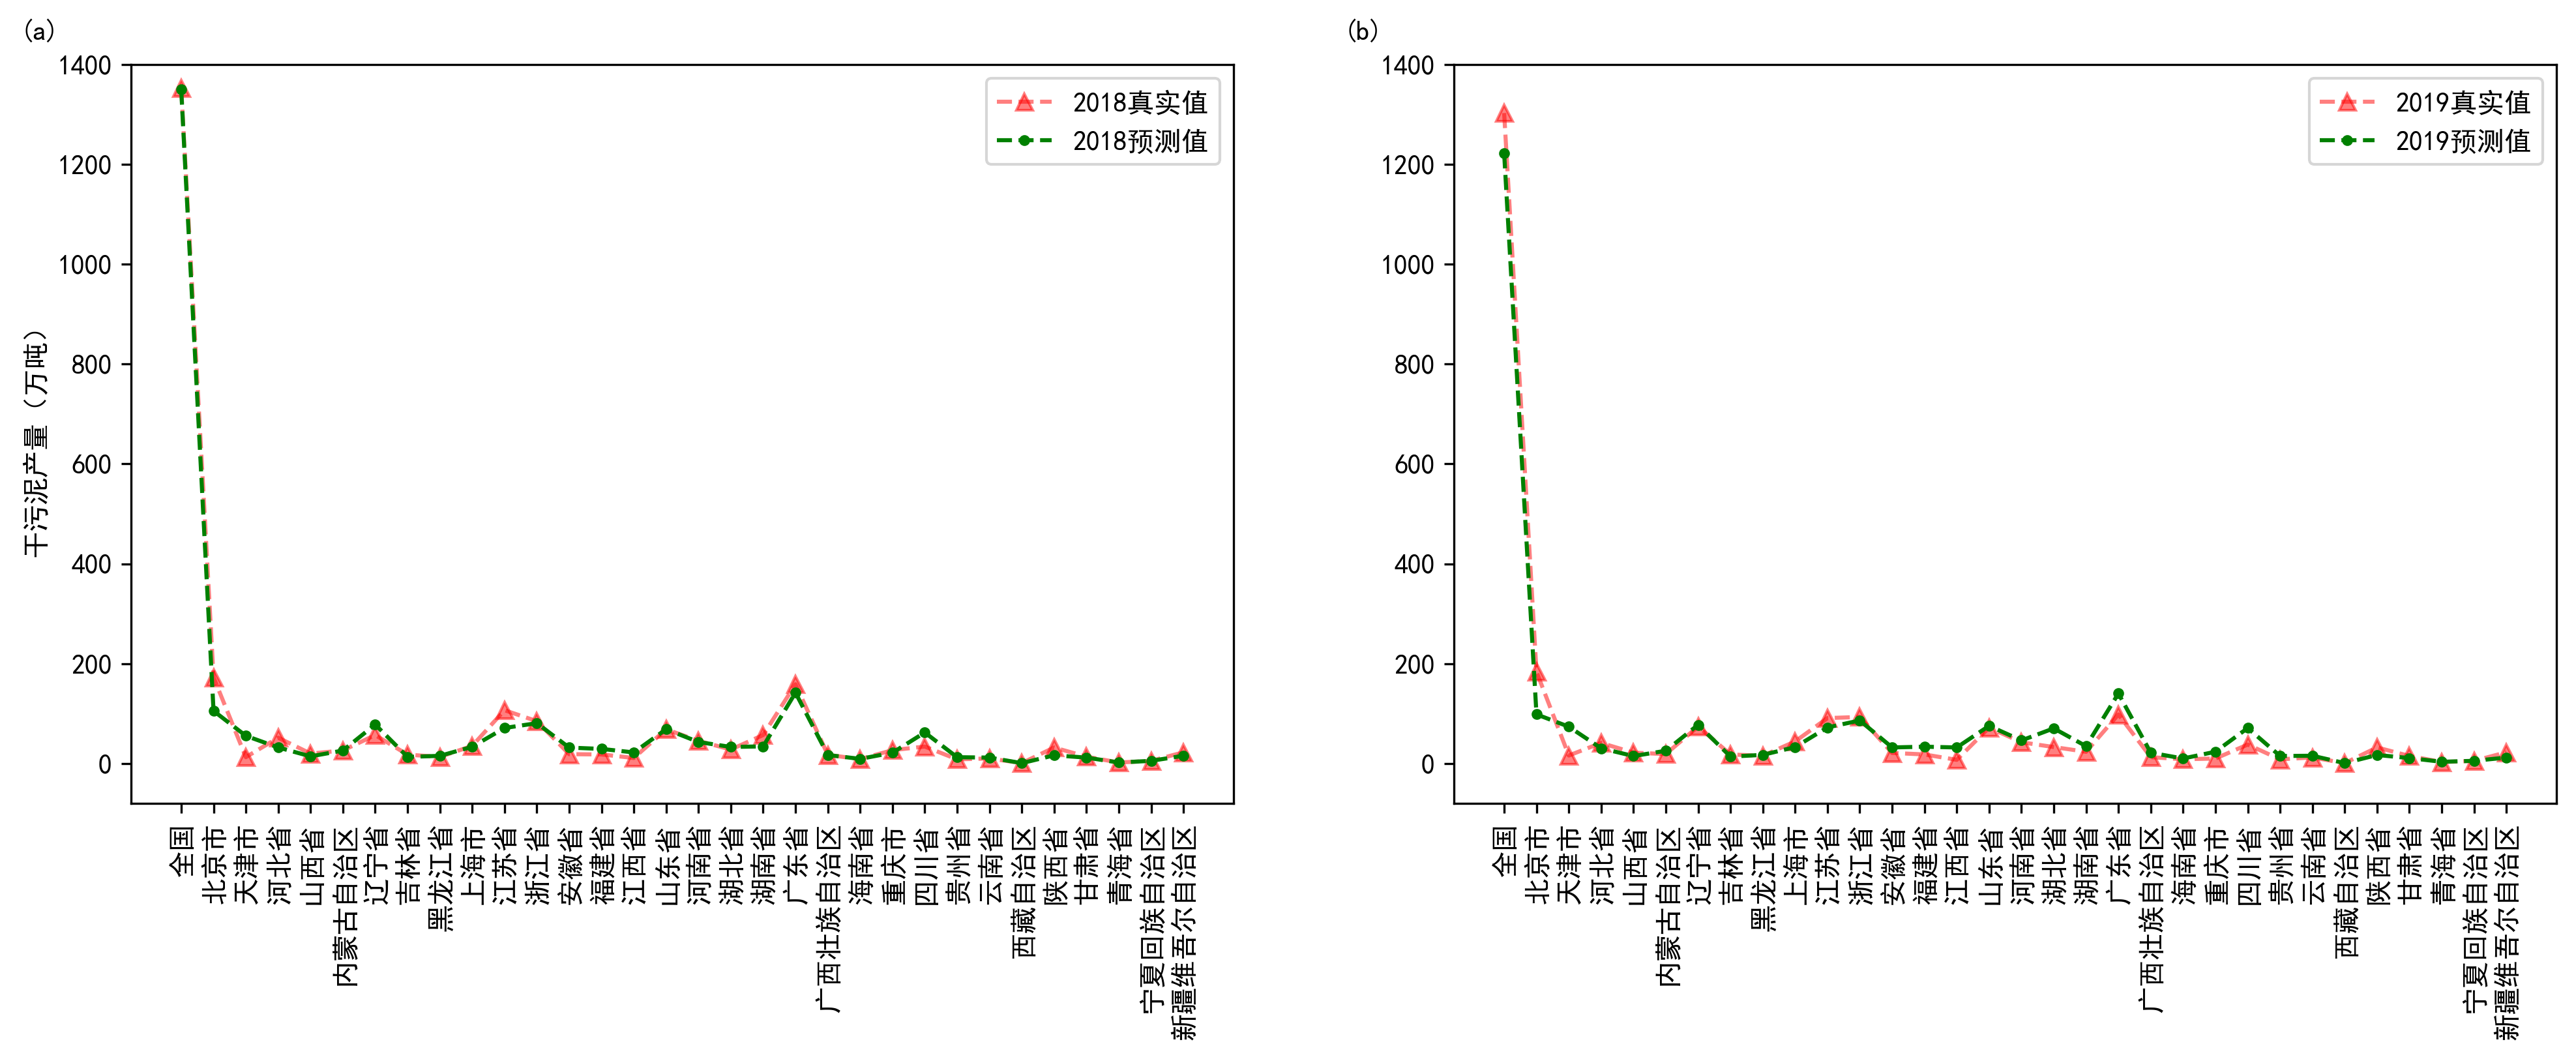

In [4]:
#验证数据可视化
validation_2018 = validation[validation['YEAR'] == 2018]
validation_2019 = validation[validation['YEAR'] == 2019]
#validation_2018 = validation_2018.drop([0], axis=0)

plt.figure(figsize=(16, 5), dpi=300)

ax1 = plt.subplot(121)
plt.plot(validation_2018['PROVINCE'], validation_2018['SLUDGE']/10000, color='r', linestyle='--', marker='^', alpha=0.5, label='2018真实值')
plt.plot(validation_2018['PROVINCE'], validation_2018['result']/10000, color='g', linestyle='--', marker='.', label='2018预测值')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.ylabel('干污泥产量（万吨）')
plt.ylim(-80,1400)
ax1.text(-5, 1450, '(a)')
ax2 = plt.subplot(122)
plt.plot(validation_2019['PROVINCE'], validation_2019['SLUDGE']/10000, color='r', linestyle='--', marker='^', alpha=0.5, label='2019真实值')
plt.plot(validation_2019['PROVINCE'], validation_2019['result']/10000, color='g', linestyle='--', marker='.', label='2019预测值')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.ylim(-80,1400)
ax2.text(-5, 1450, '(b)')
plt.savefig('validation.png', bbox_inches = 'tight')
plt.show()

In [5]:
#SSP全国数据
SSP1 = pd.read_csv('SSP1.csv')
SSP2 = pd.read_csv('SSP2.csv')
SSP3 = pd.read_csv('SSP3.csv')
SSP4 = pd.read_csv('SSP4.csv')
SSP5 = pd.read_csv('SSP5.csv')
S0 = pd.read_csv('S0.csv')

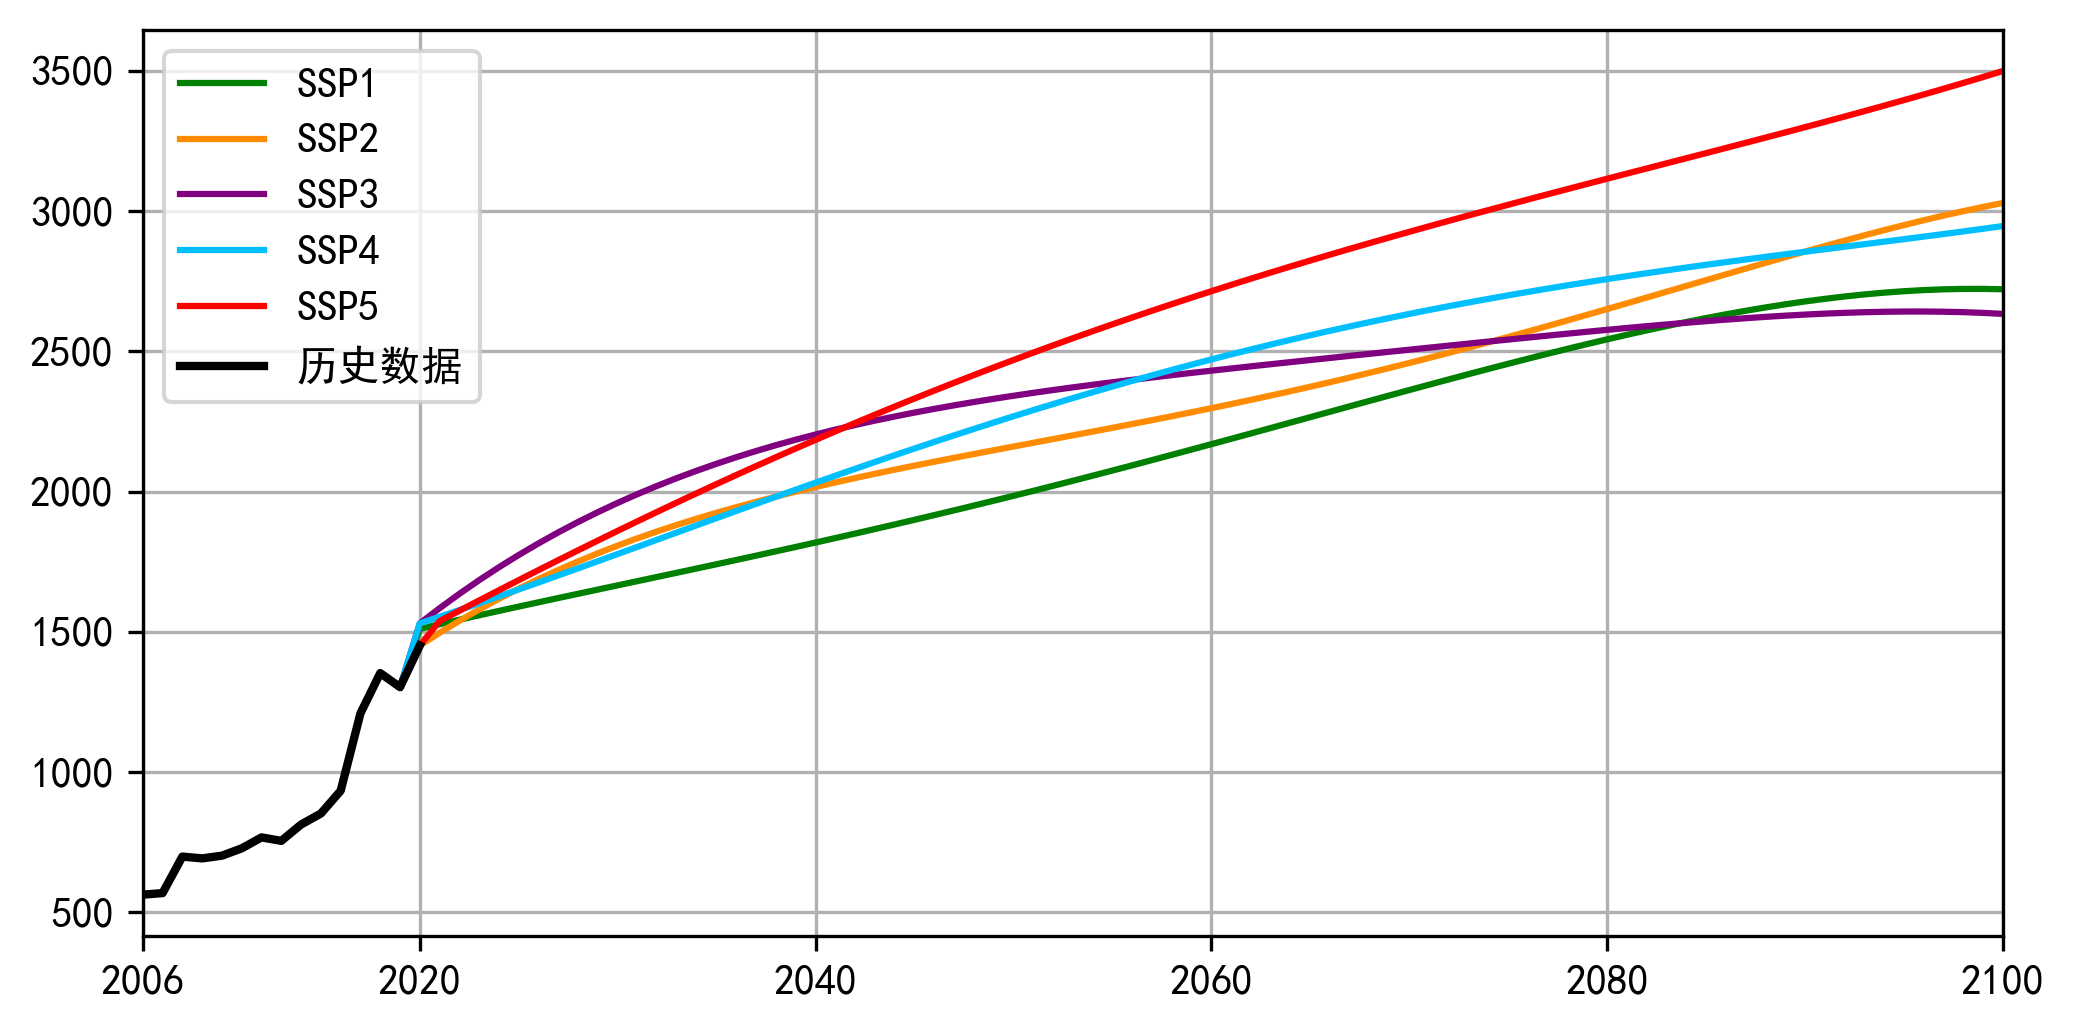

In [6]:
#全国污泥数据增量
plt.figure(figsize=(8, 4), dpi=300)
plt.plot(SSP1['YEAR'], SSP1['RESULT']/10000, color='green')
plt.plot(SSP2['YEAR'], SSP2['RESULT']/10000, color='darkorange')
plt.plot(SSP3['YEAR'], SSP3['RESULT']/10000, color='purple')
plt.plot(SSP4['YEAR'], SSP4['RESULT']/10000, color='deepskyblue')
plt.plot(SSP5['YEAR'], SSP5['RESULT']/10000, color='red')
plt.plot(S0['YEAR'], S0['SLUDGE']/10000, color='black',linewidth=2)
plt.grid(True)
plt.xlim(2006,2100)
plt.xticks([2006,2020,2040,2060,2080,2100])
plt.legend(['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5', '历史数据'])
plt.savefig('ssp.png', bbox_inches = 'tight')

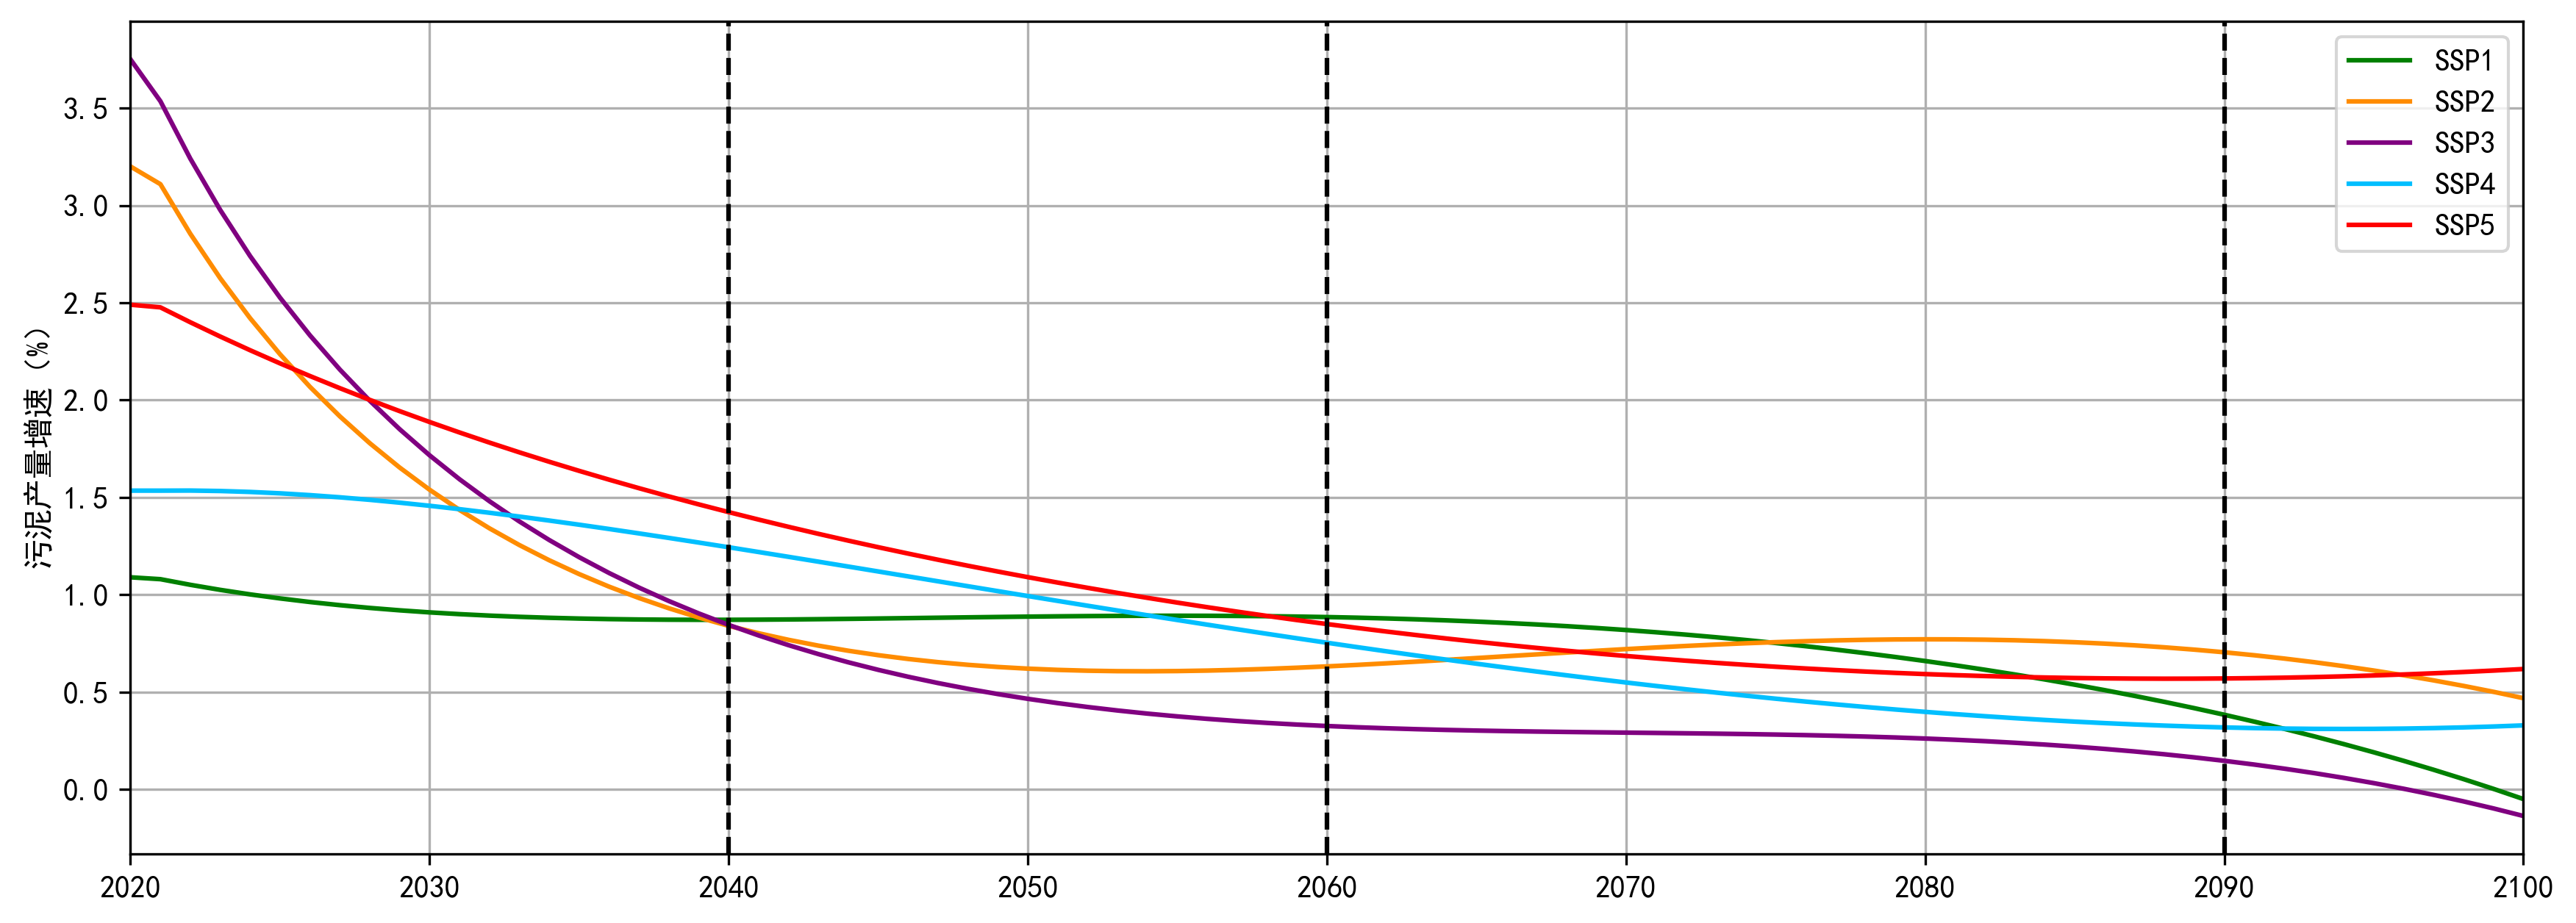

In [7]:
#污泥增长速率
plt.figure(figsize=(14, 5), dpi=300)
plt.plot(SSP1['YEAR'], SSP1['speed'], color='green')
plt.plot(SSP2['YEAR'], SSP2['speed'], color='darkorange')
plt.plot(SSP3['YEAR'], SSP3['speed'], color='purple')
plt.plot(SSP4['YEAR'], SSP4['speed'], color='deepskyblue')
plt.plot(SSP5['YEAR'], SSP5['speed'], color='red')
plt.grid(True)
plt.legend(['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])

plt.axvline(x=2040,ls="--",c="black")
plt.axvline(x=2060,ls="--",c="black")
plt.axvline(x=2090,ls="--",c="black")
plt.ylabel('污泥产量增速（%）')
plt.xlim(2020,2100)
plt.savefig('speed', bbox_inches='tight')

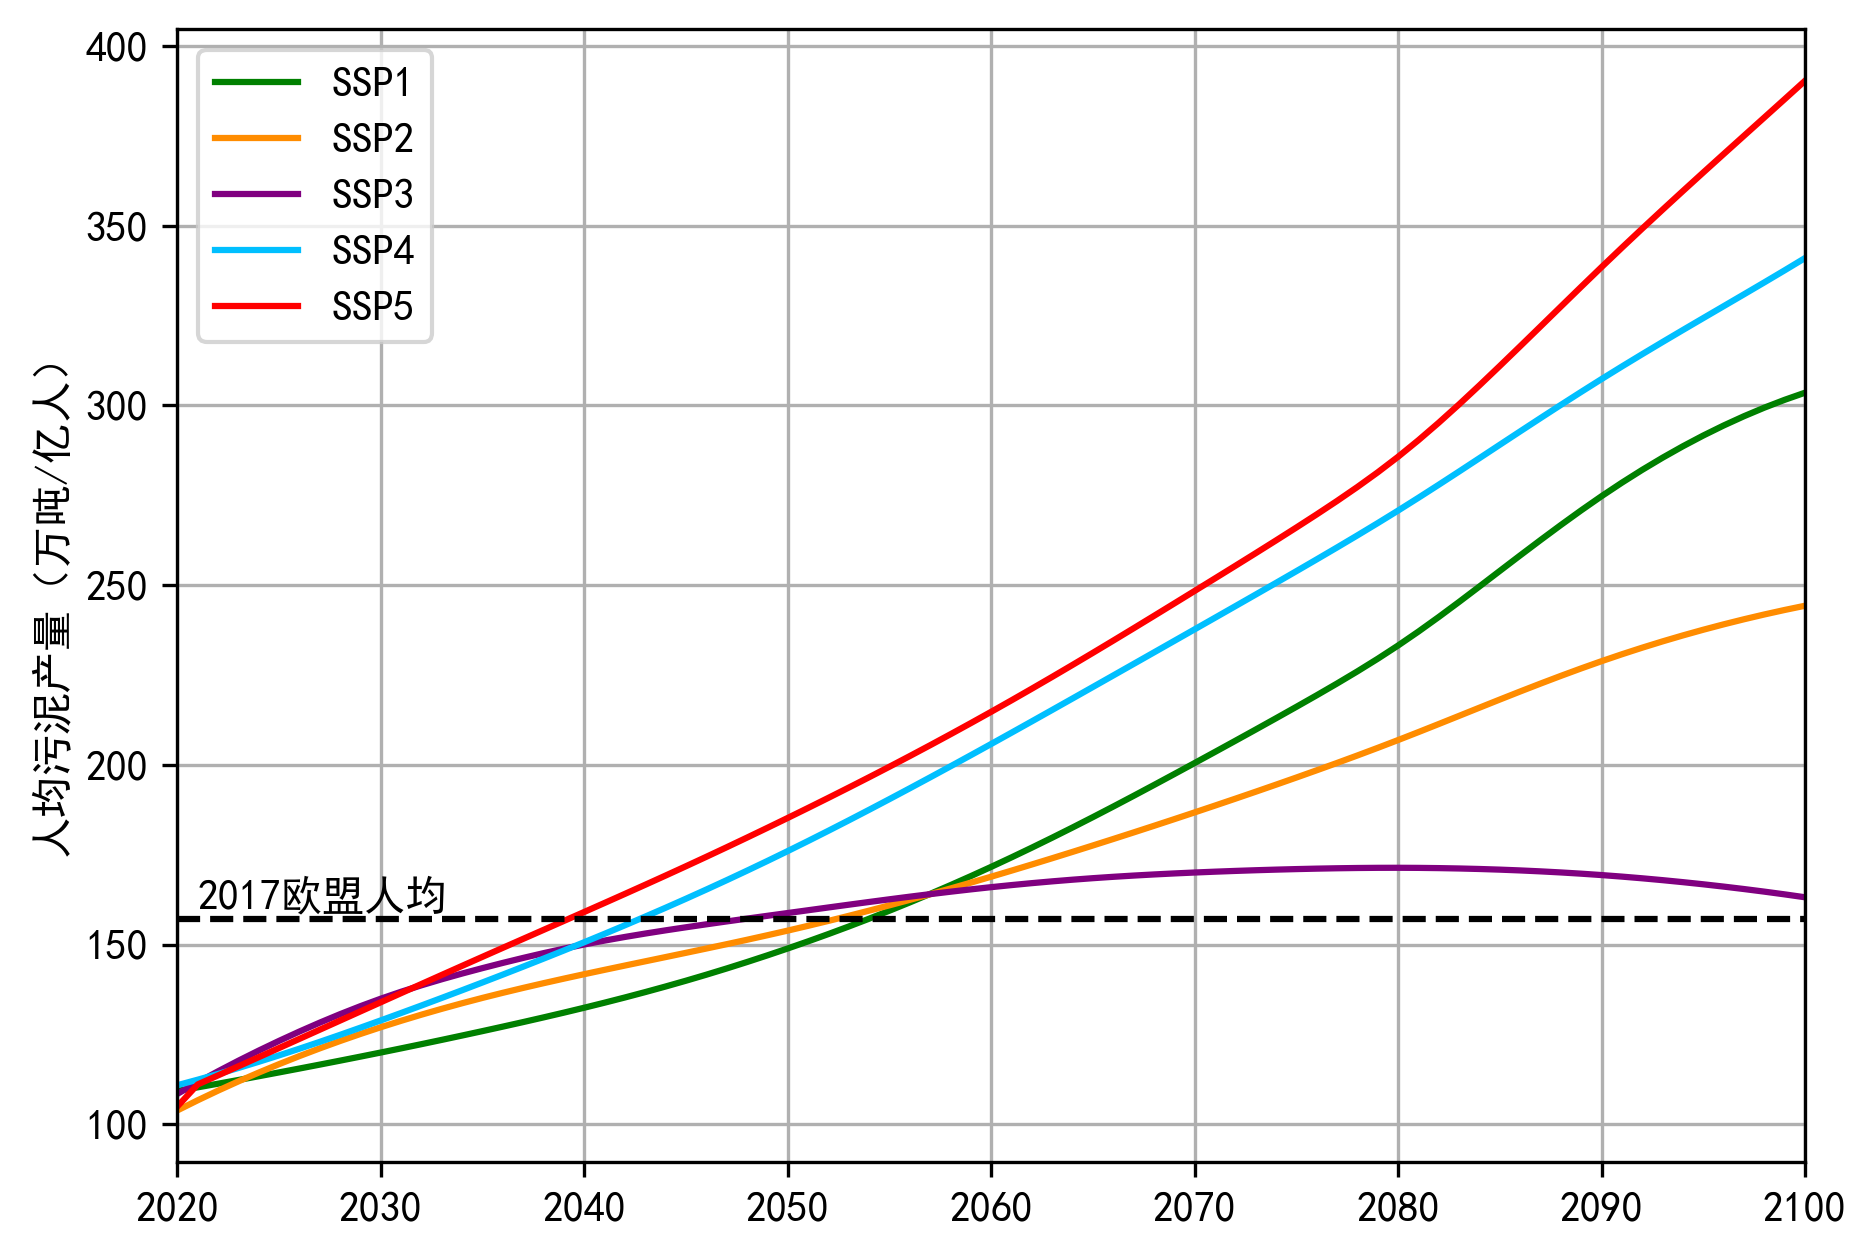

In [8]:
#人均污泥展示
plt.figure(figsize=(7, 5), dpi=300)
SSP1['PC'] = SSP1['RESULT']/SSP1['POP']*10000
SSP2['PC'] = SSP2['RESULT']/SSP2['POP']*10000
SSP3['PC'] = SSP3['RESULT']/SSP3['POP']*10000
SSP4['PC'] = SSP4['RESULT']/SSP4['POP']*10000
SSP5['PC'] = SSP5['RESULT']/SSP5['POP']*10000
plt.plot(SSP1['YEAR'], SSP1['PC'], color='green')
plt.plot(SSP2['YEAR'], SSP2['PC'], color='darkorange')
plt.plot(SSP3['YEAR'], SSP3['PC'], color='purple')
plt.plot(SSP4['YEAR'], SSP4['PC'], color='deepskyblue')
plt.plot(SSP5['YEAR'], SSP5['PC'], color='red')

plt.xlim(2020,2100)
plt.text(2021,160,'2017欧盟人均')
plt.axhline(y=157.02,ls="--",c="black")
plt.grid(True)
plt.legend(['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])
plt.ylabel('人均污泥产量（万吨/亿人）')

plt.savefig('sludge_pc.png', bbox_inches='tight')

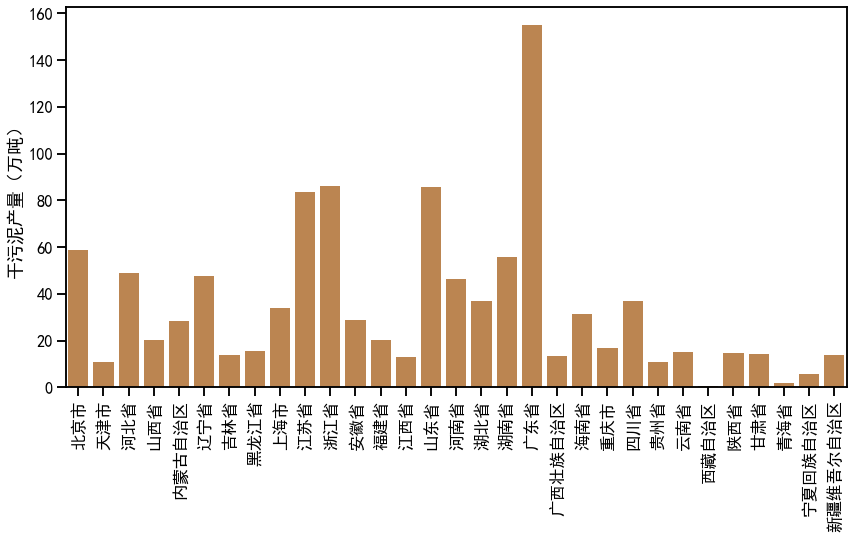

In [9]:
#2017分省污泥可视化
pro_2017 = pd.read_csv('2017.csv', encoding='utf-8')
pro_2017['ss'] = pro_2017['S']/10000
sns.set_context('talk')
plt.figure(figsize=(14, 7))
#sns.set_palette(['g','darkorange','purple','deepskyblue','red'])
sns.barplot(x='Pro', y='ss', data=pro_2017, color='peru')
plt.xticks(rotation=90)
#g.set(xlabel=None, ylabel='干污泥产量（万吨）')
plt.xlabel(None)
plt.ylabel('干污泥产量（万吨）')
plt.savefig('bar2017.png',dp1=300,bbox_inches = 'tight')

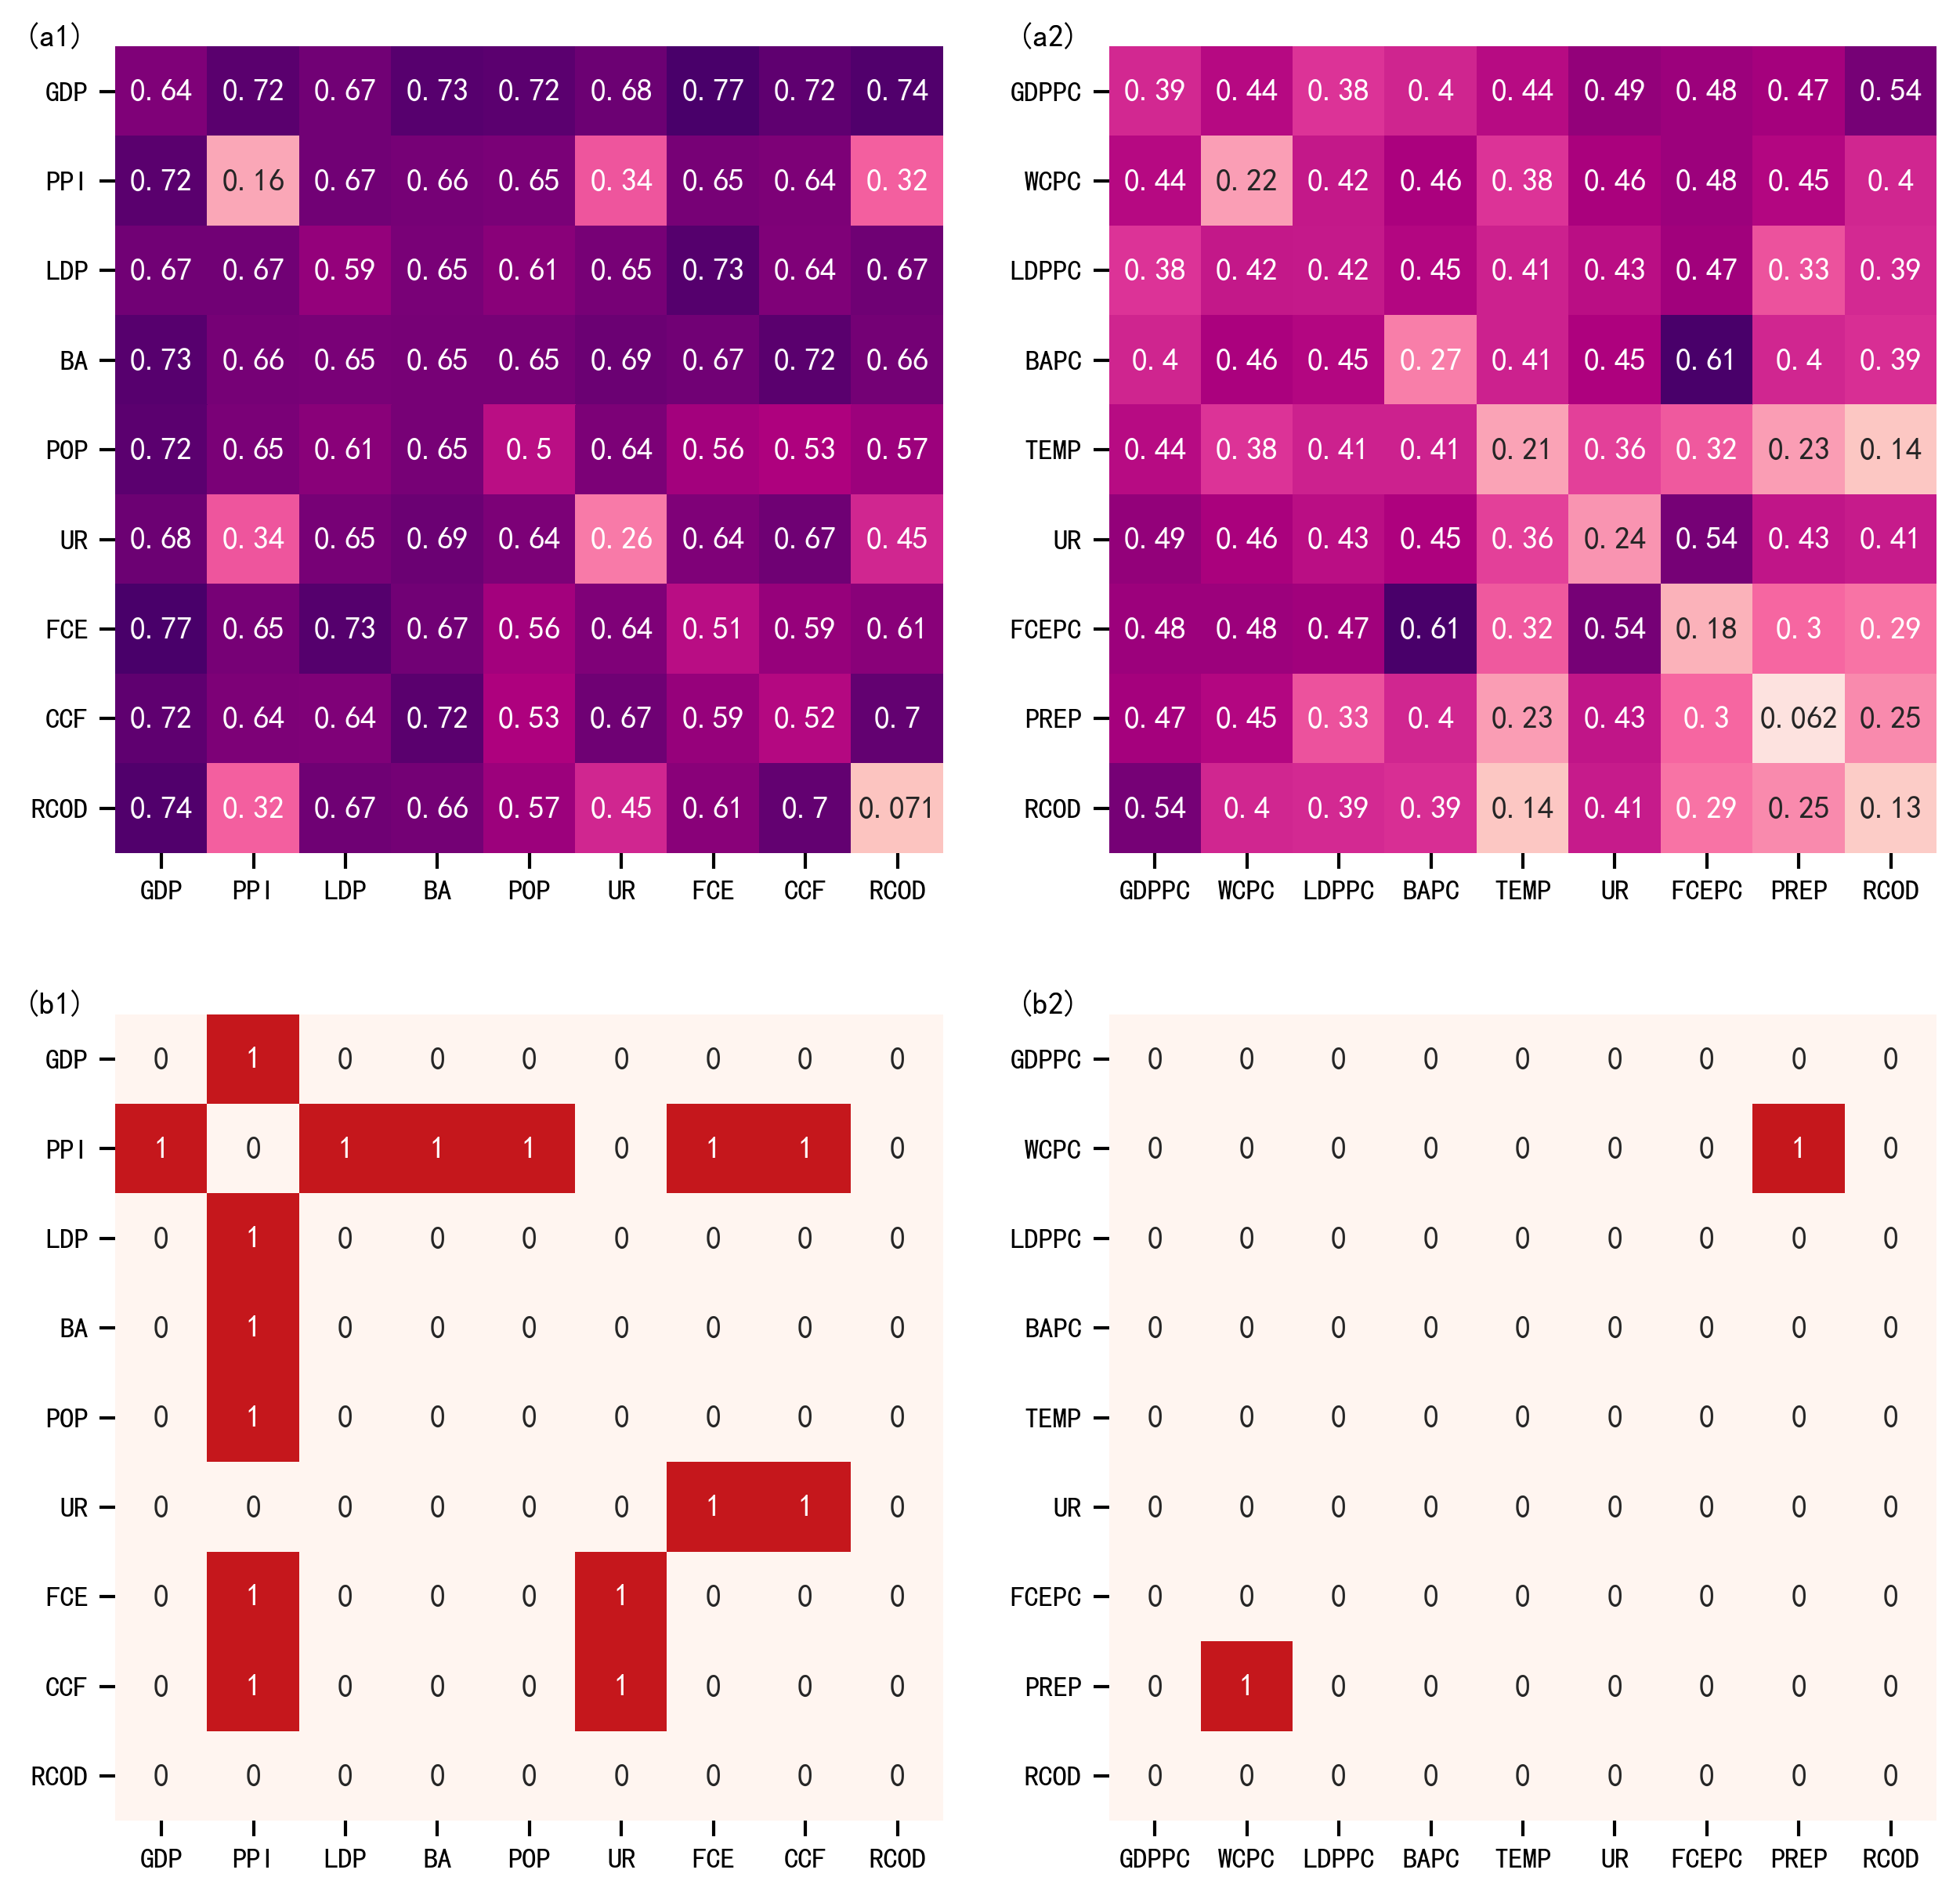

In [10]:
#交互探测与生态探测
sns.set_context('paper')
IN = pd.read_csv('IN.csv', encoding='utf-8').set_index('name')
INPC = pd.read_csv('INPC.csv', encoding='utf-8').set_index('name')
ST = pd.read_csv('ST.csv', encoding='utf-8').set_index('name')
STPC = pd.read_csv('STPC.csv', encoding='utf-8').set_index('name')

plt.figure(figsize=(10,10), dpi=300)
plt.figure(1)

ax1 = plt.subplot(221)
sns.heatmap(IN, annot=True, cmap="RdPu", center=0.3, cbar=False)
plt.ylabel(None)
plt.yticks(rotation=0)
ax1.text(-1, 0, '(a1)')



ax2 = plt.subplot(222)
sns.heatmap(INPC, annot=True, cmap="RdPu", center=0.3, cbar=False)
plt.ylabel(None)
plt.yticks(rotation=0)
ax2.text(-1, 0, '(a2)')

ax3 = plt.subplot(223)
sns.heatmap(ST, annot=True, cmap="Reds", center=0.65, cbar=False)
plt.ylabel(None)
plt.yticks(rotation=0)
ax3.text(-1, 0, '(b1)')

ax4 = plt.subplot(224)
sns.heatmap(STPC, annot=True, cmap="Reds", center=0.65, cbar=False)
plt.ylabel(None)
plt.yticks(rotation=0)
ax4.text(-1, 0, '(b2)')

plt.savefig('IN.png', bbox_inches = 'tight')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


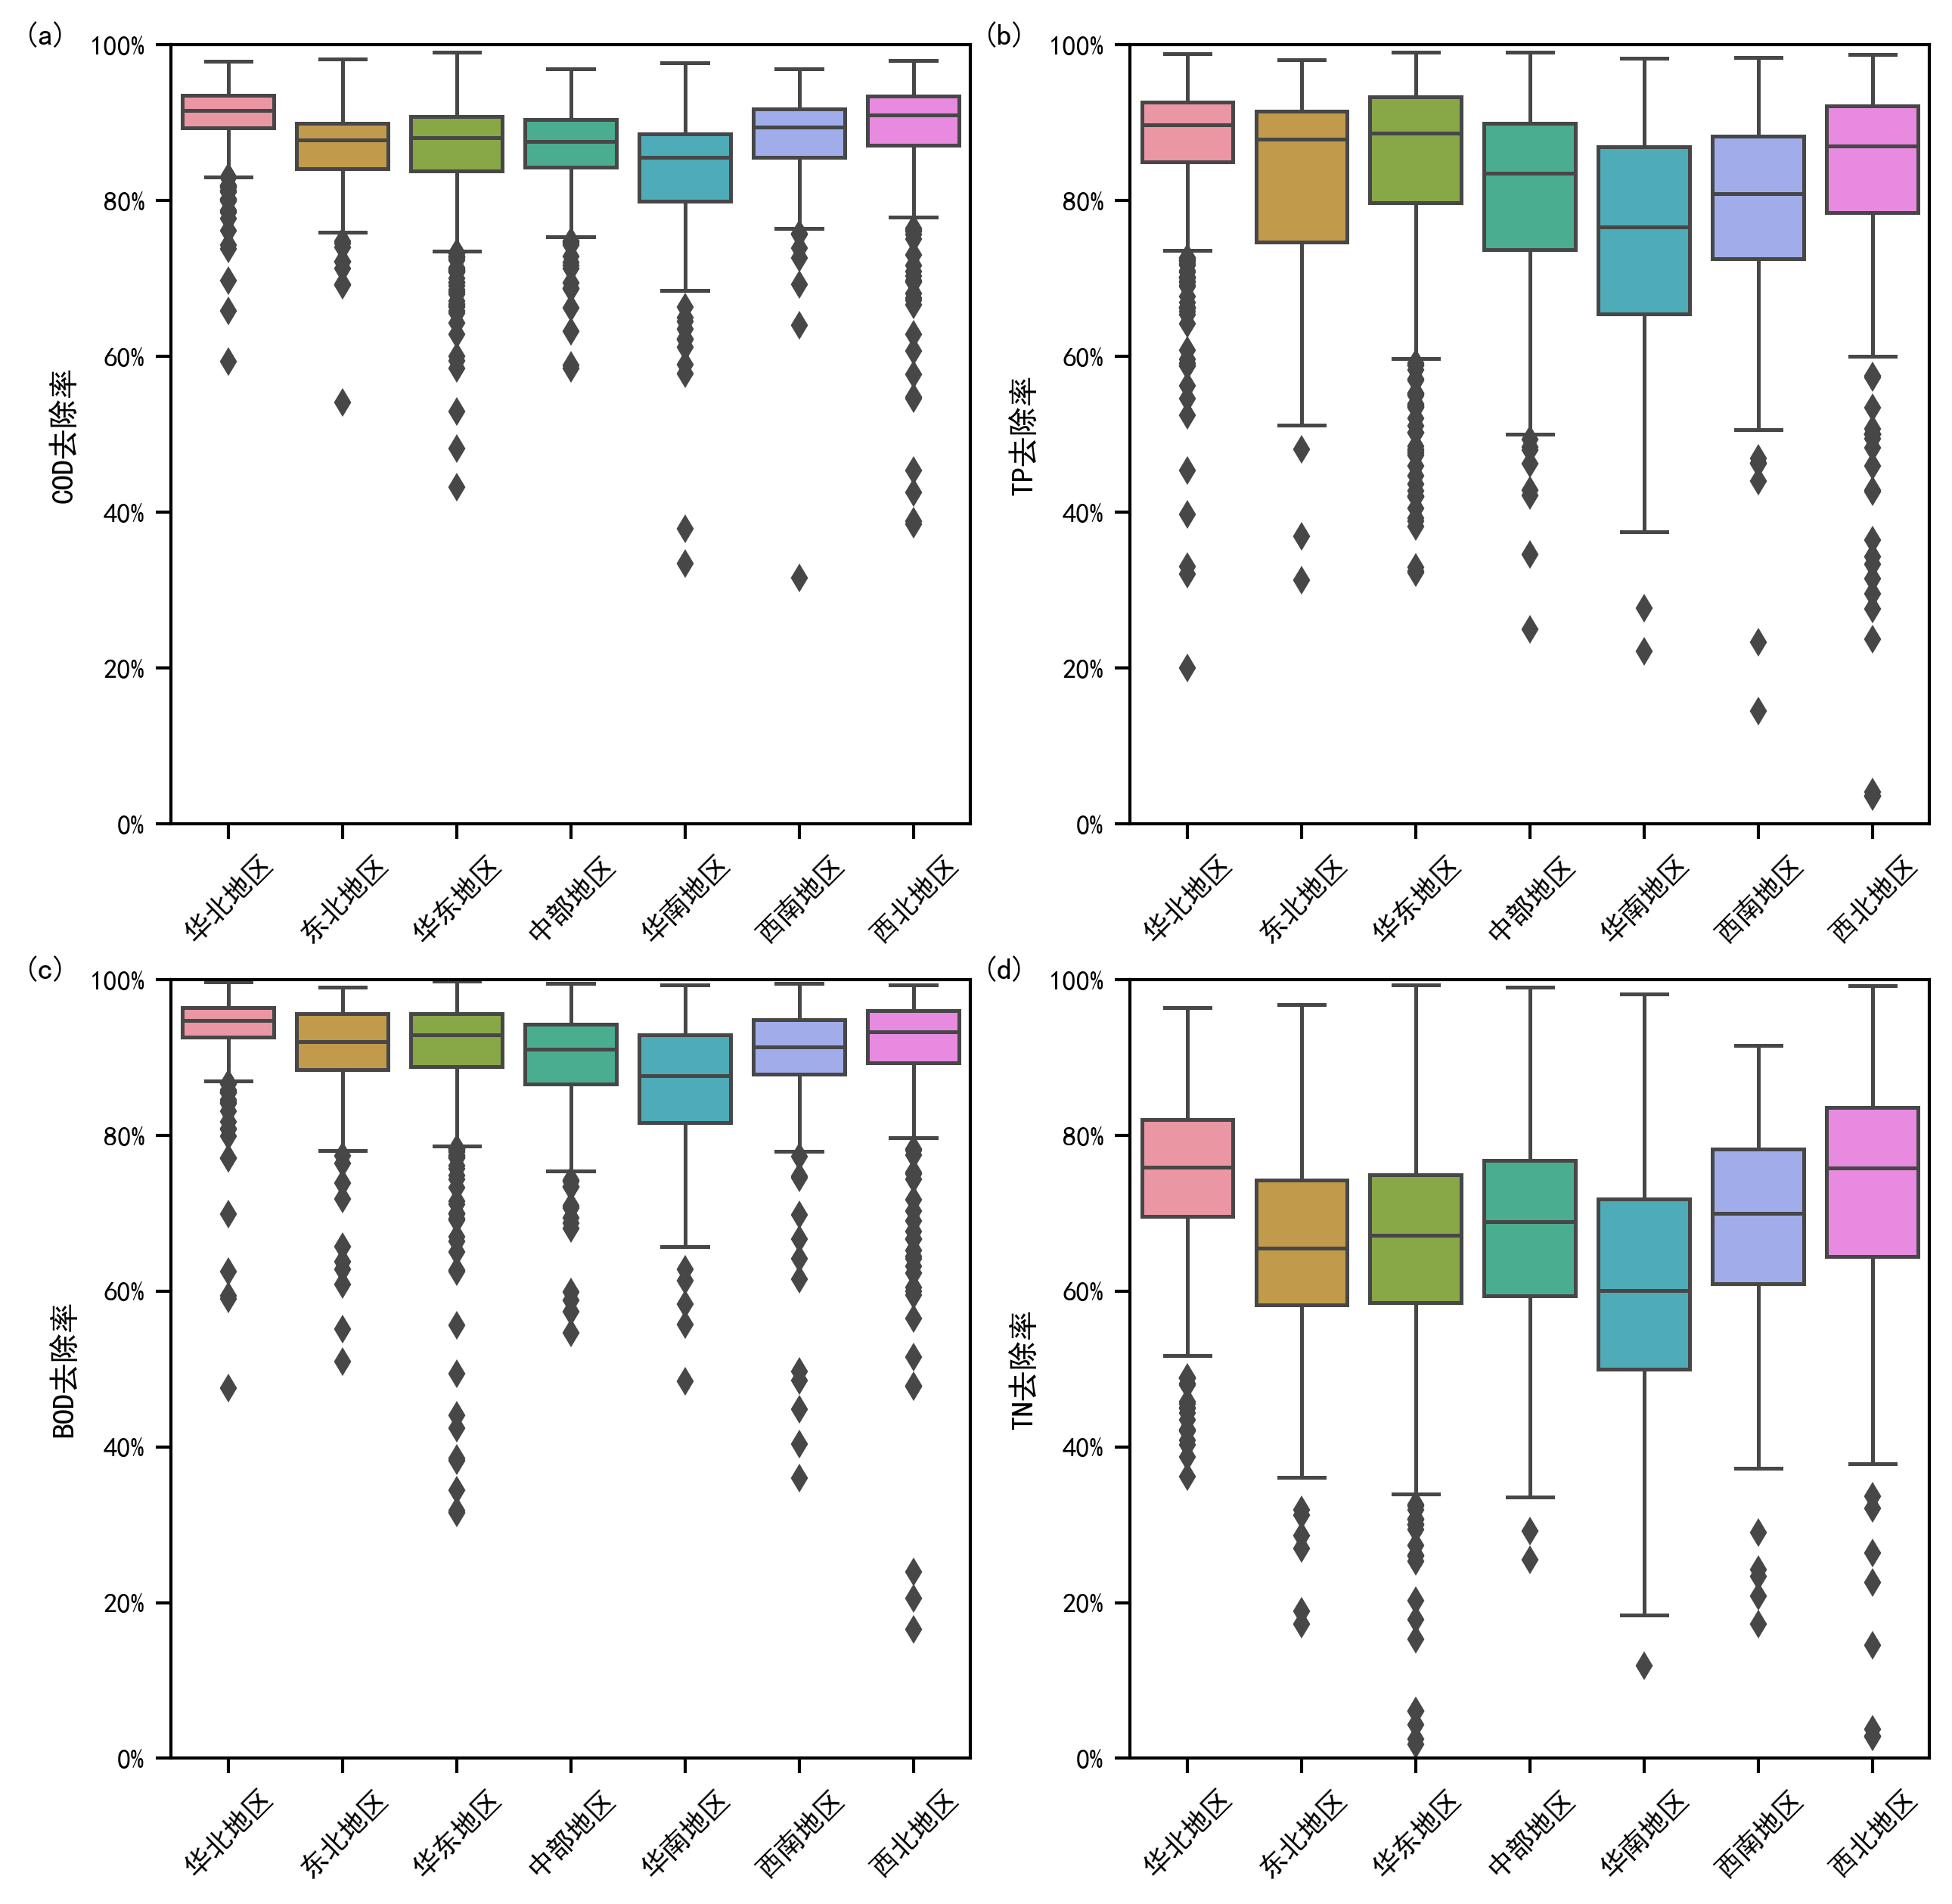

In [11]:
#污泥处置技术可视化
rop = pd.read_csv('remove_of_pollutants.csv', encoding='utf-8')
rop_0 = rop[rop['RCOD'] != 0][rop['RTP'] != 0][rop['RTN'] != 0][rop['RBOD'] != 0]

plt.figure(figsize=(10,10), dpi=300)
plt.figure(1)

ax1 = plt.subplot(221)
sns.boxplot(data=rop_0, x='区域', y='RCOD')
plt.xlabel(None)
plt.ylabel('COD去除率')
plt.xticks(rotation=45)
plt.ylim((0, 1))
ax1.text(-1.8, 1, '(a)')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

ax2 = plt.subplot(222)
sns.boxplot(data=rop_0, x='区域', y='RTP')
plt.xlabel(None)
plt.ylabel('TP去除率')
plt.xticks(rotation=45)
plt.ylim((0, 1))
ax2.text(-1.8, 1, '(b)')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

ax3 = plt.subplot(223)
sns.boxplot(data=rop_0, x='区域', y='RBOD')
plt.xlabel(None)
plt.ylabel('BOD去除率')
plt.xticks(rotation=45)
plt.ylim((0, 1))
ax3.text(-1.8, 1, '(c)')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

ax4 = plt.subplot(224)
sns.boxplot(data=rop_0, x='区域', y='RTN')
plt.xlabel(None)
plt.ylabel('TN去除率')
plt.xticks(rotation=45)
plt.ylim((0, 1))
ax4.text(-1.8, 1, '(d)')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])


plt.savefig('rop.png', bbox_inches = 'tight')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPara

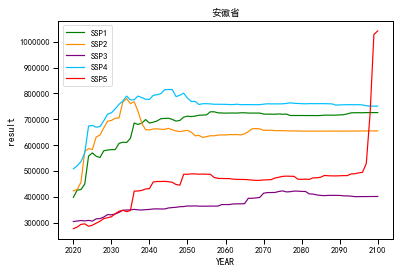

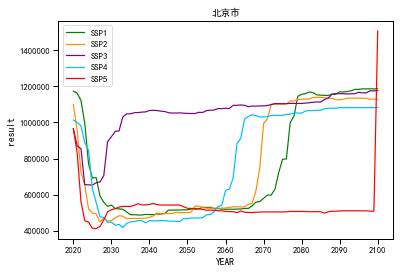

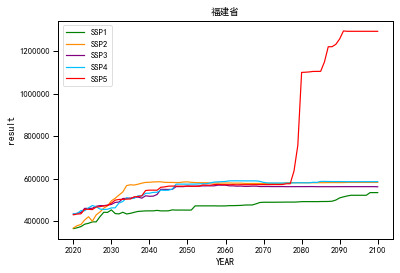

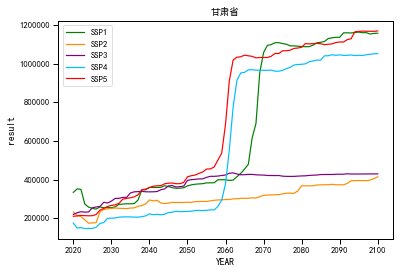

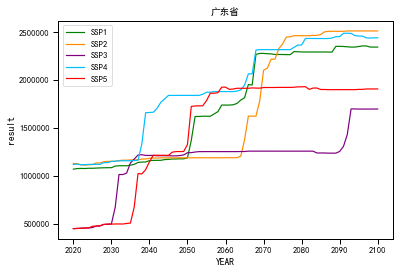

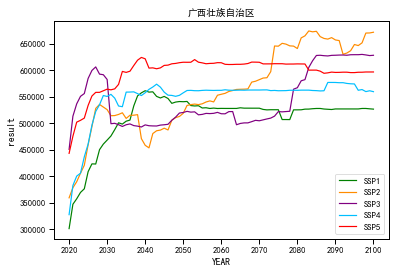

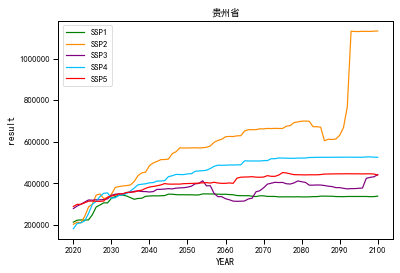

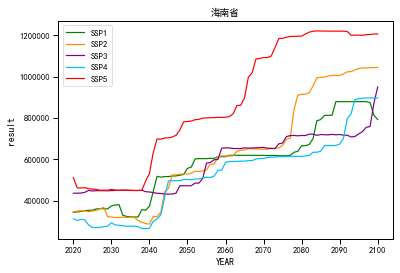

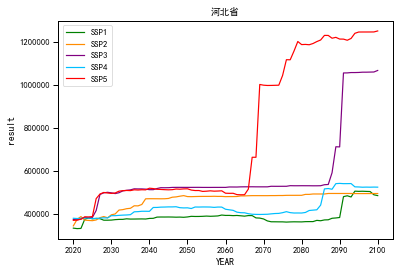

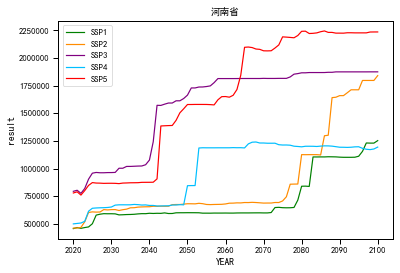

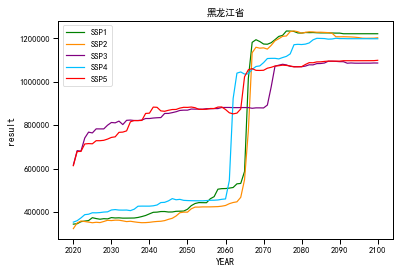

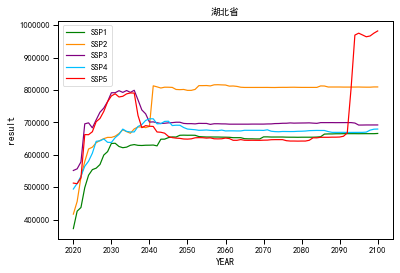

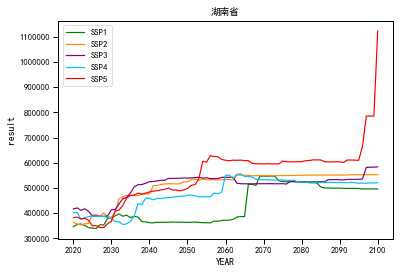

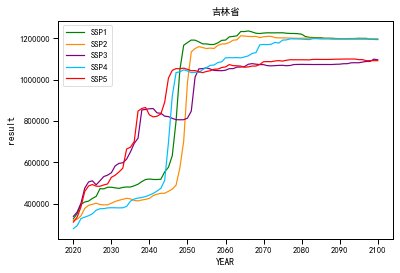

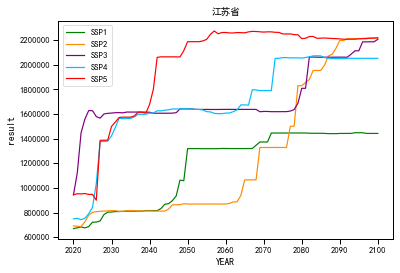

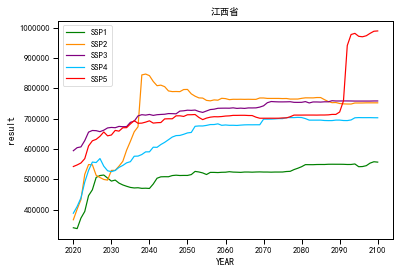

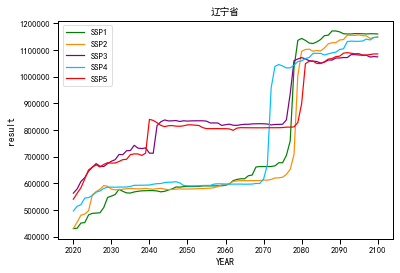

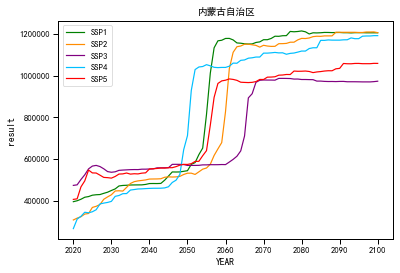

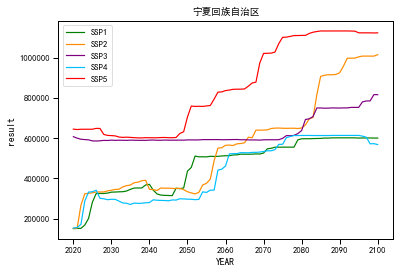

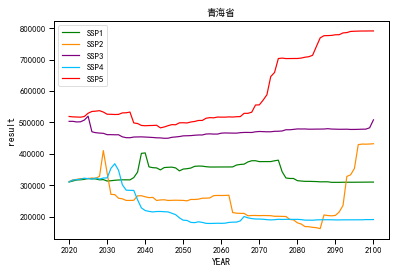

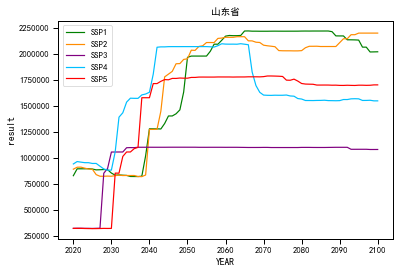

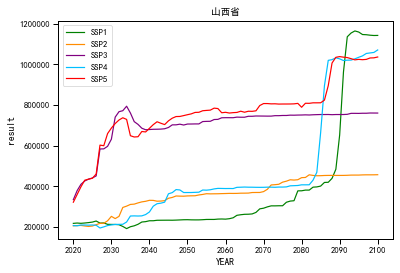

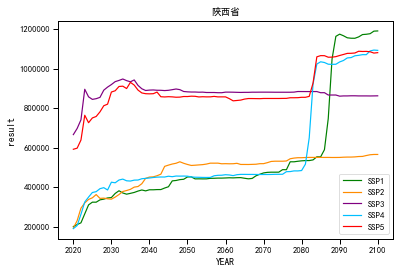

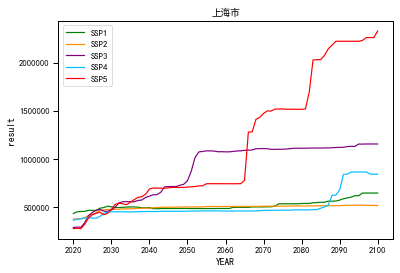

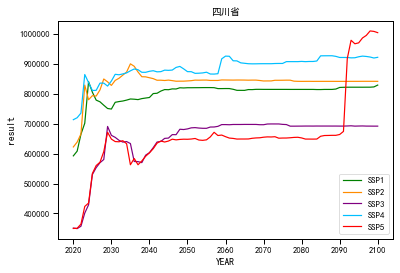

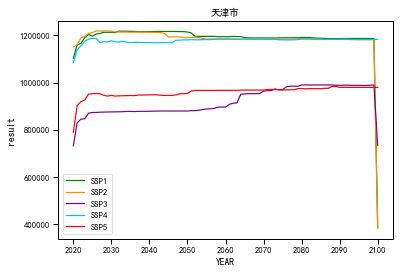

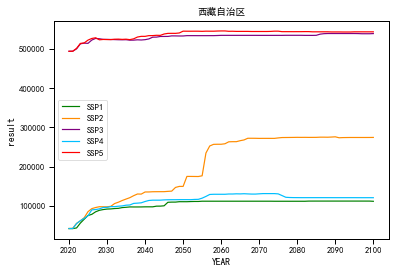

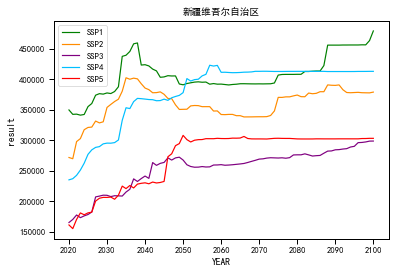

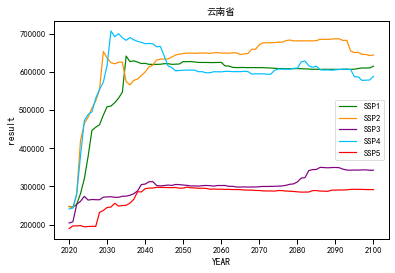

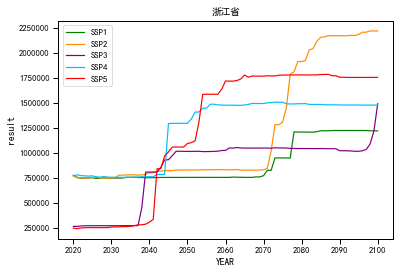

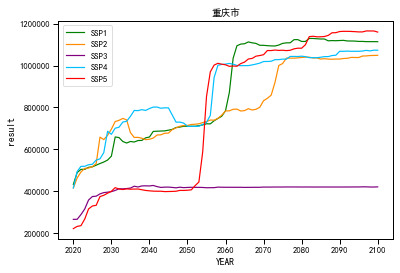

In [12]:
#省份数据展示
province = prediction_pro['PROVINCE'].unique()
def show_pro(pro, df):
    df = df[df['PROVINCE'] == pro]
    sns.lineplot(x='YEAR', y='result', data=df, hue='SSP')
    plt.title(pro)
    plt.legend(['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])
for (i, pro) in enumerate(province):
    plt.figure(i)
    show_pro(pro,prediction_pro)

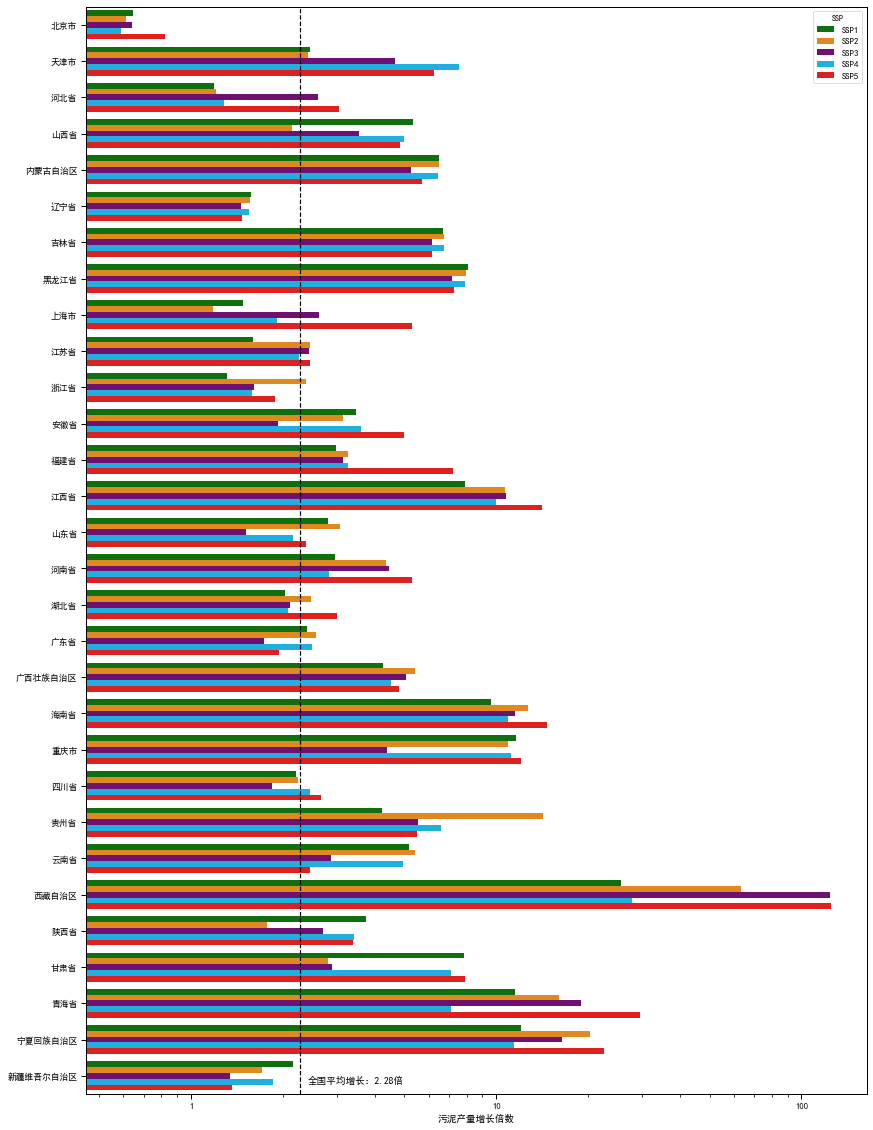

In [13]:
#2019与2100各省污泥比较
pro2100 = prediction_pro[prediction_pro['YEAR'] == 2100]
val2019 = validation[validation['YEAR'] == 2019]
vs2019_2100 = pro2100.merge(val2019, how='inner', on='PROVINCE')
vs2019_2100['2100vs2019'] = vs2019_2100['result_x']/vs2019_2100['SLUDGE']

plt.figure(figsize=(14, 20))
sns.set_palette(['g','darkorange','purple','deepskyblue','red'])
sns.barplot(y='PROVINCE', x='2100vs2019',order=['北京市','天津市','河北省','山西省',\
                                       '内蒙古自治区','辽宁省','吉林省','黑龙江省',\
                                       '上海市','江苏省','浙江省','安徽省','福建省',\
                                       '江西省','山东省','河南省','湖北省','广东省',\
                                       '广西壮族自治区','海南省','重庆市','四川省','贵州省',\
                                       '云南省','西藏自治区','陕西省','甘肃省','青海省',\
                                       '宁夏回族自治区','新疆维吾尔自治区'], data=vs2019_2100, hue='SSP')
plt.axvline(x=2.28,ls="--",c="black")
plt.xlabel('污泥产量增长倍数')
plt.ylabel(None)
plt.xscale('log')
plt.xticks([1, 10, 100], ['1', '10', '100'])
plt.text(2.4,29.2,'全国平均增长：2.28倍')
plt.savefig('2019vs2100.png', bbox_inches = 'tight')

In [42]:
Sludge = 36040000
ad_L = 960
ac_L = 731

L = (ac_L + ad_L)/2
sl = 1587
si = 2341
bmp = 1240

la = 0.293
i = 0.267
sla = 0.201
bm = 0.159
o = 0.08

In [43]:
a = Sludge*0.2*si*i

In [44]:
b = Sludge*0.2*sl*sla

In [45]:
c = Sludge*0.2*la*L

In [46]:
d = Sludge*0.2*bmp*bm

In [47]:
a + b + c + d

10011375004.0